# stLearn Cell-cell interaction analysis

### 1. Data loading and preprocessing

In [1]:
import stlearn as st
import pandas as pd
import random
st.settings.set_figure_params(dpi=100)
# read in visium dataset downloaded from: support.10xgenomics.com/spatial-gene-expression/datasets/1.0.0/V1_Breast_Cancer_Block_A_Section_2
data = st.Read10X("[PATH_TO_DATASET]")
# st.add.image(adata=data, imgpath="C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Human_Breast_Cancer_Block_A_Section_1\\spatial\\tissue_hires_nobg.png",
#             library_id="V1_Breast_Cancer_Block_A_Section_1",visium=True)
# preprocessing
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.scale(data)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Normalization step is finished in adata.X
Scale step is finished in adata.X


### 2. Count cell type diversity (between-spots)

#### Read in the cell type predictions for each spot from Seurat label transfer results based on a labelled scRNA dataset

label transfer results added to adata.uns['label_transfer']
predicted label added to adata.obs['predictions'].


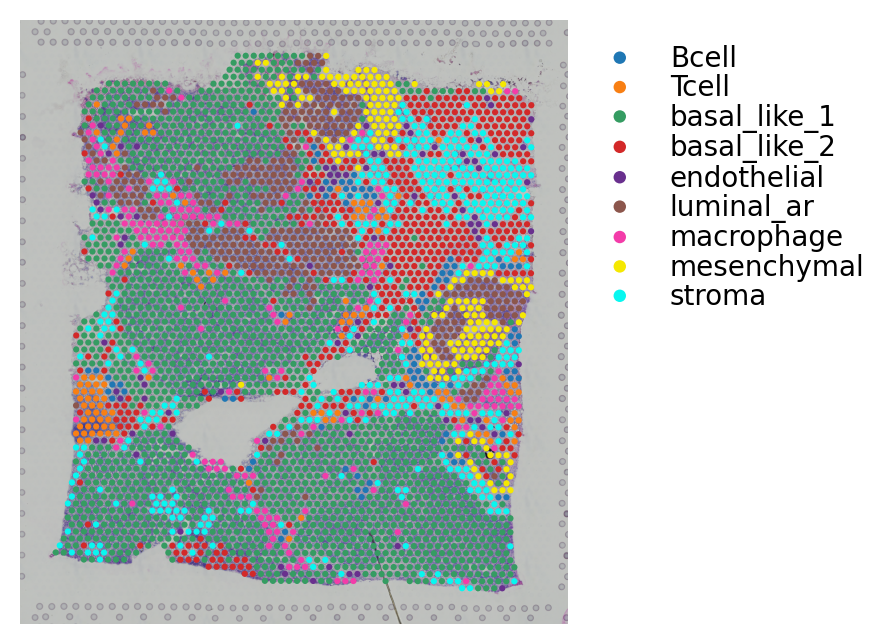

In [2]:
st.add.labels(data, 'tutorials/label_transfer_bc.csv', sep='\t')
st.pl.cluster_plot(data,use_label="predictions")

#### Count cell type diversity for between-spot mode

Counts for cluster (cell type) diversity stored into adata.uns['cci_het']


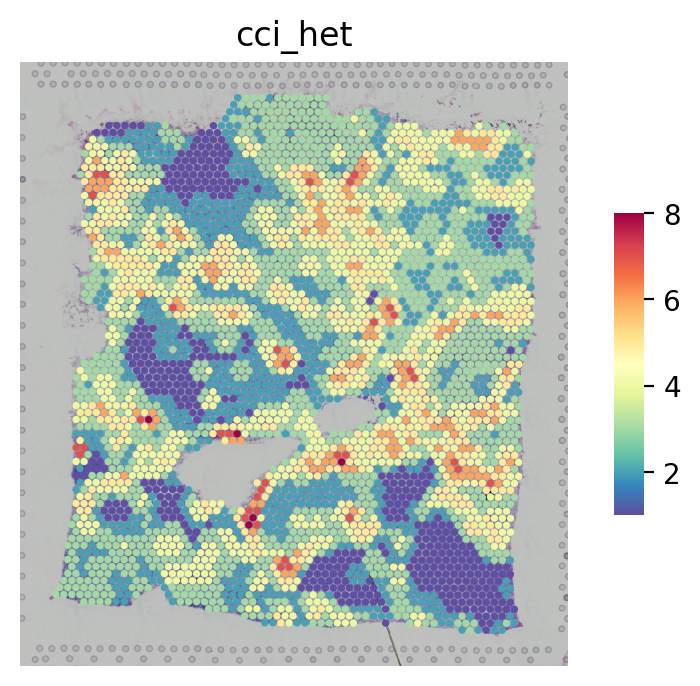

In [3]:
st.tl.cci.het.count(data, use_label='label_transfer')
st.pl.het_plot(data, use_het='cci_het')

### 3. Ligand-receptor co-expression (between-spots)

#### Read in user input LR pair

In [4]:
data.uns["lr"] = ['IL34_CSF1R']

#### Ligand-receptor co-expression in the neighbouring spots

Altogether 2 valid L-R pairs
L-R interactions with neighbours are counted and stored into adata.obsm['cci_lr']


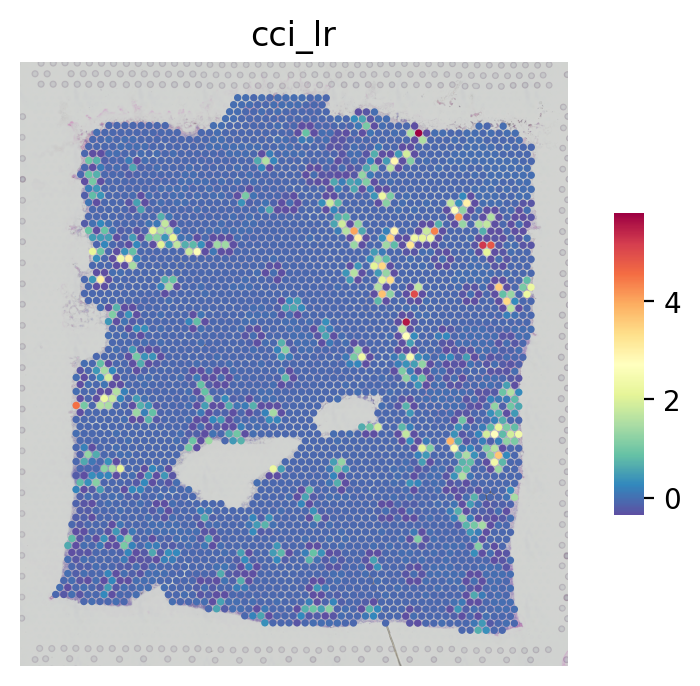

In [5]:
st.tl.cci.lr(adata=data)
st.pl.het_plot(data, use_het='cci_lr', image_alpha=0.7)

### 4. Calculate merged CCI scores (between-spots)

Results of spatial interaction analysis has been written to adata.uns['merged']


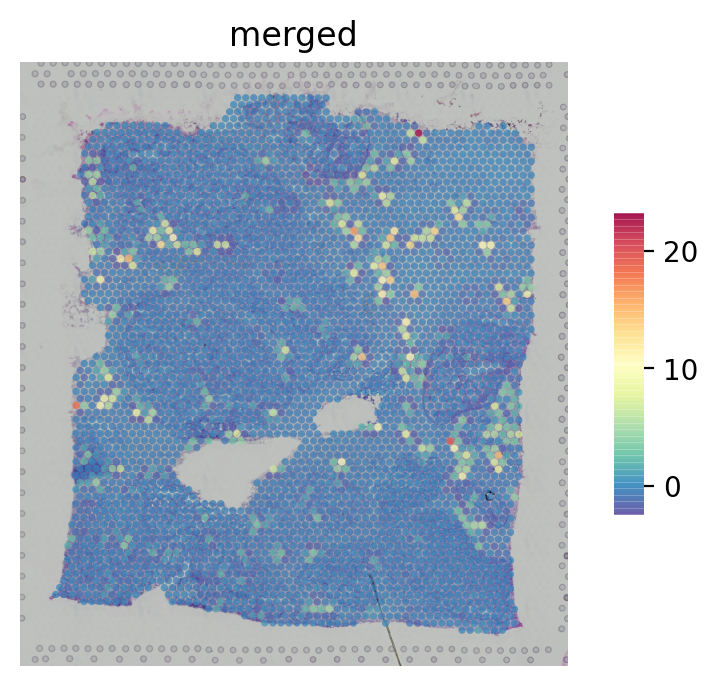

In [6]:
st.tl.cci.merge(data, use_lr='cci_lr', use_het='cci_het')
st.pl.het_plot(data, use_het='merged', cell_alpha=0.7)

### 5. Permutation test (between-spots) (could be time consuming)

#### Permutation Run

In [7]:
st.tl.cci.permutation(data, use_het='cci_het', n_pairs=200)

Optimization terminated successfully.
         Current function value: 2.327597
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Results of permutation test has been kept in adata.obsm['merged_pvalues']
Significant merged result has been kept in adata.obsm['merged_sign']


#### Significance Test against null distribution

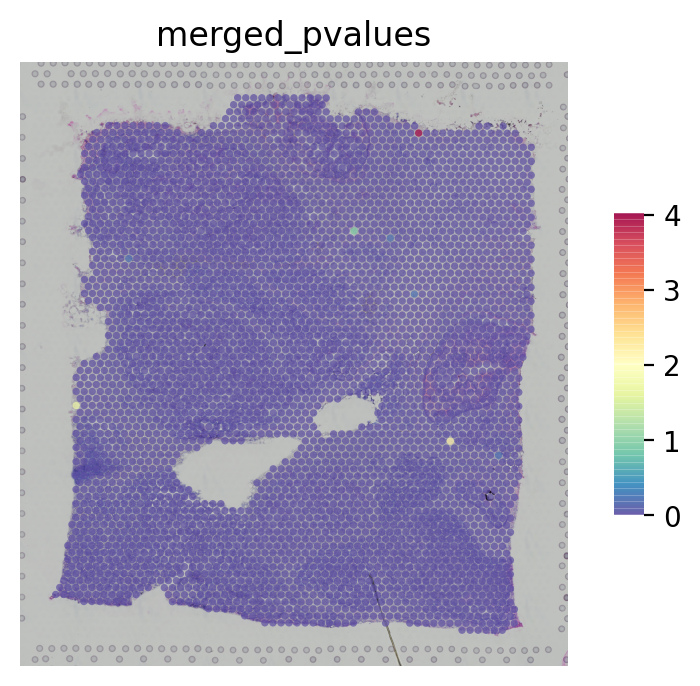

In [8]:
# plot the -log10(pvalue) from permutation test on each spot
st.pl.het_plot(data, use_het='merged_pvalues', cell_alpha=0.7)

#### Final significant hotspots

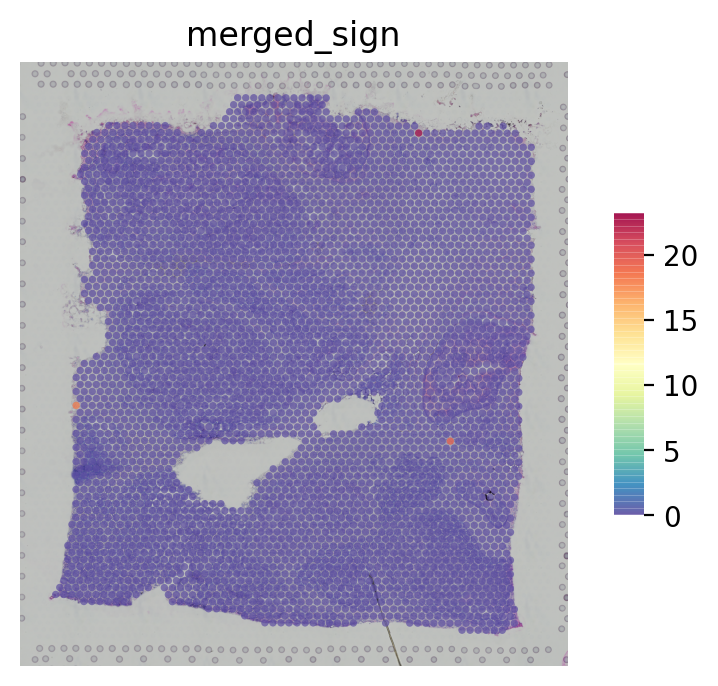

In [9]:
st.pl.het_plot(data, use_het='merged_sign', cell_alpha=0.7)

### 6. Count cell type diversity (within-spots)

Counts for cluster (cell type) diversity stored into adata.uns['cci_het']


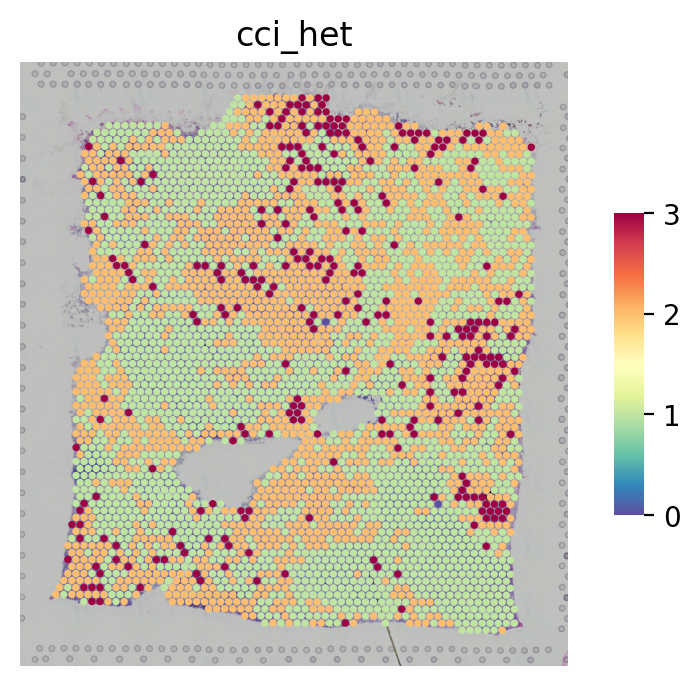

In [10]:
st.tl.cci.het.count(data, use_label='label_transfer', distance=0)
st.pl.het_plot(data, use_het='cci_het')

### 7. Ligand-receptor co-expression (within-spot)

#### Read in user input LR pair

In [11]:
data.uns["lr"] = ['IL34_CSF1R']

#### Ligand-receptor co-expression within each spot

Altogether 2 valid L-R pairs
L-R interactions with neighbours are counted and stored into adata.obsm['cci_lr']


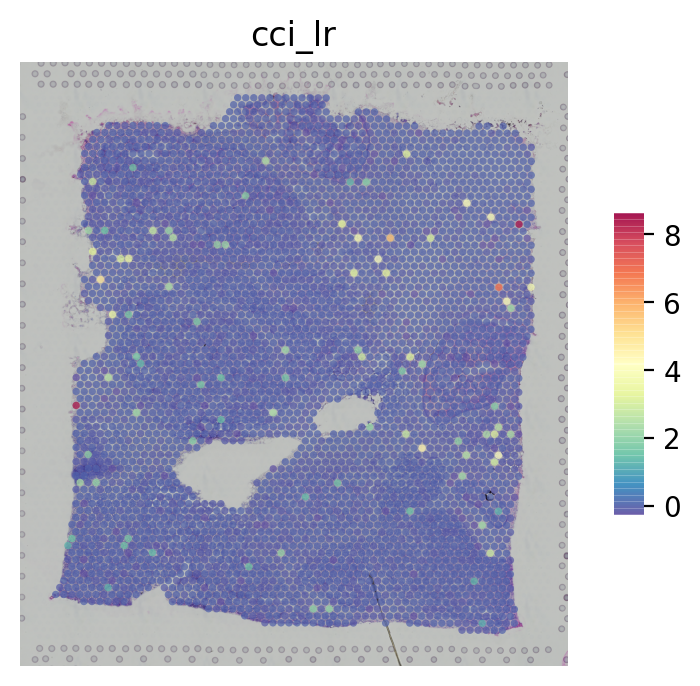

In [12]:
st.tl.cci.lr(adata=data, distance=0)
st.pl.het_plot(data, use_het='cci_lr', cell_alpha=0.7)

### 8. Calculate merged CCI scores (within-spot)

Results of spatial interaction analysis has been written to adata.uns['merged']


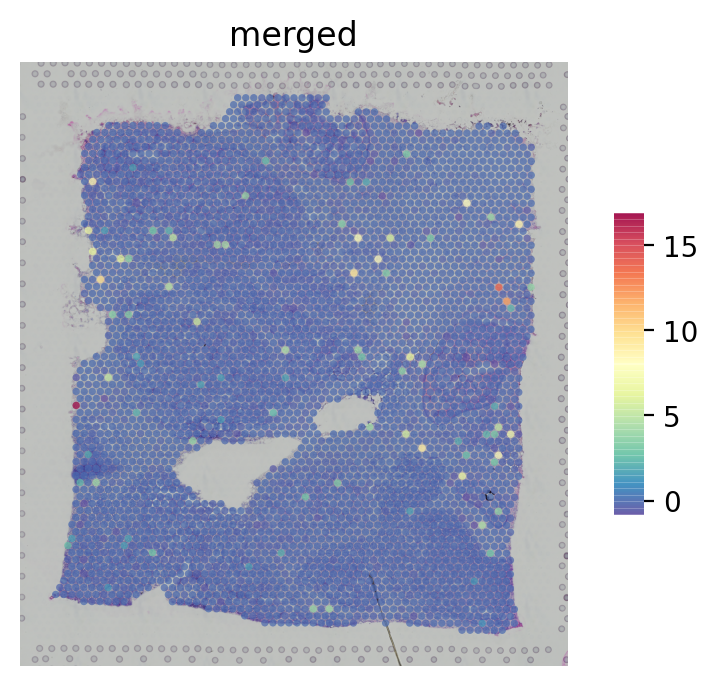

In [13]:
st.tl.cci.merge(data, use_lr='cci_lr', use_het='cci_het')
st.pl.het_plot(data, use_het='merged', cell_alpha=0.7)

### 9. Permutation test (within-spot) (could be time consuming)

#### Permutation Run

In [14]:
st.tl.cci.permutation(data, use_het='cci_het', n_pairs=200, distance=0)

Optimization terminated successfully.
         Current function value: 1.687254
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Results of permutation test has been kept in adata.obsm['merged_pvalues']
Significant merged result has been kept in adata.obsm['merged_sign']


#### Significance Test against null distribution

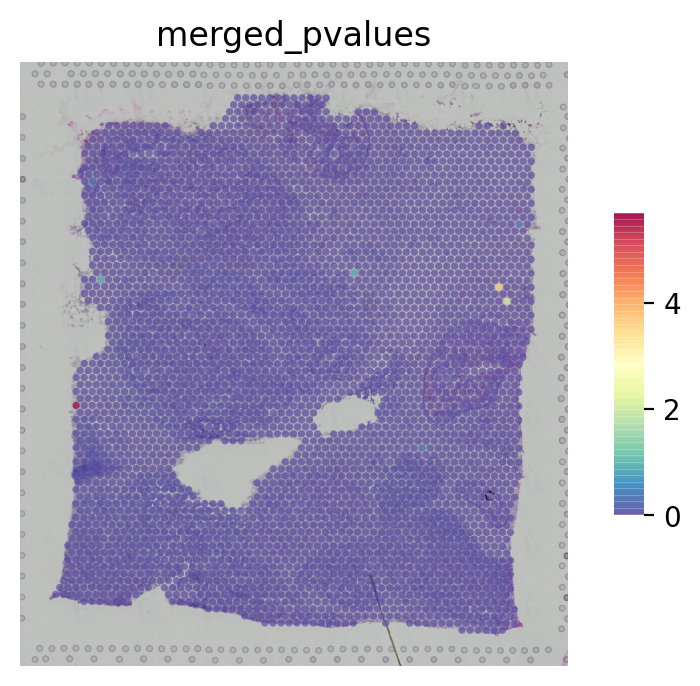

In [15]:
# plot the -log10(pvalue) from permutation test on each spot
st.pl.het_plot(data, use_het='merged_pvalues', cell_alpha=0.7)

#### Final significant hotspots

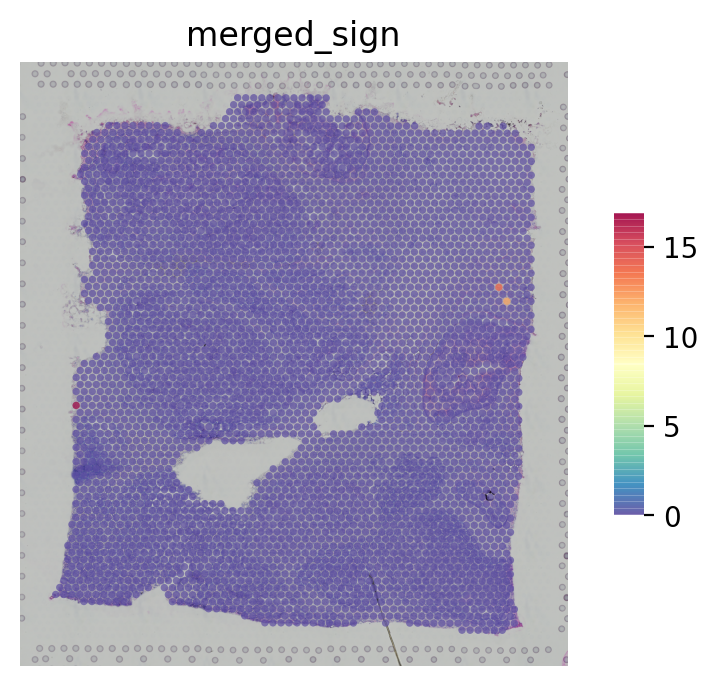

In [16]:
st.pl.het_plot(data, use_het='merged_sign', cell_alpha=0.7)